# Team Members and Personal Description


## Roshni Gandhi 
 Created the queries for half the questions and reformatted and finalized all queries. Created the descriptions and graphs for the queries to show a graphical repesentation of some of the data. Worked with team on creation of graphs for visualization. Also improved language in the README.md description file.


## Lily Mayer
Developed and implemented the majority of the code. Also helped to create queries, improve them, then implement them. Developed and expanded the script, explanations/interpretations, and analyses. Reviewed final submission with team members.


## Gina Seo
Worked with other members to create the code outline. Also helped contribute to finalizing queries. Developed a good work ethic and management with the other teammates. Also created base structure for README.md description file.


## Jesigga Sigurdardottir 
Researched, decided upon, and finalized the Data frame that we decided to use. Finalized formatting of code, worked on, created questions, and created slightly more sophisticated questions. Also worked on explanations of questions with other teammates.  

## Kiley Wonser
Helped to create slightly more sophisticated questions. Developed and expanded the descriptions with members and reviewed the final results with the team. Included descriptions of the queries into the README.md. 


# Code and Queries 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

Read in dataset from Github

In [29]:
#reads in dataset fron github
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-10-17/taylor_all_songs.csv')

Subsets the dataframe to select the attributes that we will use.

In [30]:
#subsets the dataframe to only attributes of interest
taylor_data = data[['album_name', 'album_release', 'artist', 'featuring', 'track_name', 'danceability', 'energy', 'acousticness']]
print(taylor_data)

       album_name album_release           artist                  featuring  \
0    Taylor Swift    2006-10-24     Taylor Swift                        NaN   
1    Taylor Swift    2006-10-24     Taylor Swift                        NaN   
2    Taylor Swift    2006-10-24     Taylor Swift                        NaN   
3    Taylor Swift    2006-10-24     Taylor Swift                        NaN   
4    Taylor Swift    2006-10-24     Taylor Swift                        NaN   
..            ...           ...              ...                        ...   
269           NaN           NaN       Tim McGraw  Taylor Swift, Keith Urban   
270           NaN           NaN  Big Red Machine               Taylor Swift   
271           NaN           NaN       Ed Sheeran               Taylor Swift   
272           NaN           NaN              NaN                        NaN   
273           NaN           NaN  Boys Like Girls               Taylor Swift   

                  track_name  danceability  energy 

# Questions:
# 1. What is the most danceable song?
 Spotify's API takes in all the elements that went into creating a song and gives it a score from 0.0 to 1.0 on how "danceable" it is. This metric is measured by how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

In [31]:
#Question 1: What is the most danceable song?
dancing = taylor_data[['track_name', 'danceability']]
sorted_dancing = dancing.sort_values('danceability', ascending=False)
dancing_max = sorted_dancing.head(1)
print(dancing_max)

           track_name  danceability
165  I Think He Knows         0.897


Observe that the track 'I Think He Knows' is the most danceable song with a danceability of 0.897


# 2. What is the most danceable album? 
Out of all the songs that were released from 2006 to 2023, this only takes in songs that were released as part of an album while excluding any songs that are not part of the main albums. This would mean that it takes in the average danceability score from each album by adding the danceability of each song then dividing by the number of songs on the album then compares it to scores from other albums.

In [32]:
#Question 2: What is the most danceable album on average?
dancing_albums = taylor_data[['album_name', 'danceability']]
grouped_dancing_albums = dancing_albums.groupby(['album_name'])
dancing_albums_sorted = grouped_dancing_albums.first().sort_values('danceability', ascending=False)
dancing_albums_max = dancing_albums_sorted.head(1)
print(dancing_albums_max)

            danceability
album_name              
1989               0.789


Observe that the album '1989' is the most danceable album with an average danceability of 0.789


# 3. What is the most energetic song?
This attribute is based on perceptual measure of intensity and activity between 0.0 and 1.0 typically sounding more fast, loud, and noisy with more energy.

In [33]:
#Question 3:  What is the most energetic song?
energy = taylor_data[['track_name', 'energy']]
sorted_energy = energy.sort_values('energy', ascending=False)
energy_max = sorted_energy.head(1)
print(energy_max)

   track_name  energy
71    Haunted    0.95


Observe that the track 'Haunted' is the most energetic song with a energy level of 0.95


# 4. What is the most energetic album on average?
Based on perceptual measure of intensity and activity between 0.0 and 1.0 typically sounding more fast, loud, and noisy with more energy, these values are taken by the average of all the songs on the album.

In [34]:
#Question 4: What is the most energetic album on average?
energy_albums = taylor_data[['album_name', 'energy']]
grouped_energy_albums = energy_albums.groupby(['album_name'])
energy_albums_sorted = grouped_energy_albums.first().sort_values('energy', ascending=False)
energy_albums_max = energy_albums_sorted.head(1)
print(energy_albums_max)

            energy
album_name        
Red          0.825


Observe that the album 'Red' is the most energetic album with an average energy level of 0.825


# 5. How does energy correlate to danceability?
Making a graph to see the trend of dancebility vs. energy for each song. The energy variable is on the horizontal axis while the danceability variable is on the vertical axis. 

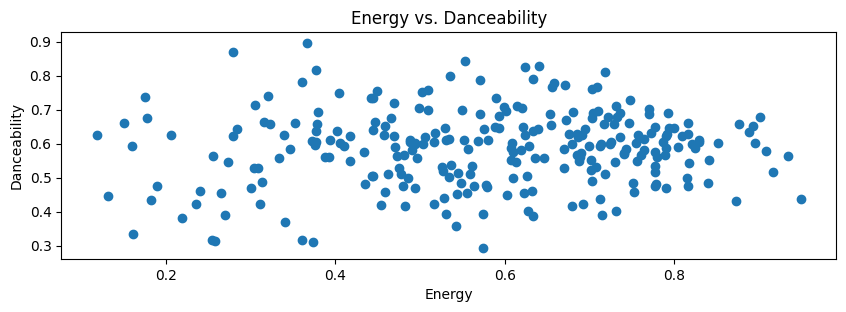

In [35]:
#Question 5: How does energy correlate to danceability?
energy_dataframe = pd.DataFrame(energy)
energy_lst = energy_dataframe['energy'].tolist()

dancing_dataframe = pd.DataFrame(dancing)
dancing_lst = dancing_dataframe['danceability'].tolist()

plot = plt.figure()
plot.set_figheight(10)
plot.set_figwidth(10)
plt.subplot(3, 1, 1)
plt.scatter(energy_lst, dancing_lst)
plt.title("Energy vs. Danceability")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.show()

Observe that one can see a correlation between energy and danceablity. They have a slightly linear relationship.


# 6. What is the most acoustic song?
Based on perceptual measure of acousticness and activity between 0.0 and 1.0.

In [36]:
#Question 6: What is the most acoustic song?
acoustic = taylor_data[['track_name', 'acousticness']]
sorted_acoustic = acoustic.sort_values('acousticness', ascending=False)
acoustic_max = sorted_acoustic.head(1)
print(acoustic_max)

                     track_name  acousticness
176  It's Nice To Have A Friend         0.971


Observe that the track 'It's Nice To Have A Friend' is the most acoustic song with an acousticness of 0.971


# 7. What is the most acoustic album?
Based on perceptual measure of acousticness and activity between 0.0 and 1.0. These values are taken by the average of all the songs on the album.

In [37]:
#Question 7: What is the most acoustic album?
acoustic_albums = taylor_data[['album_name', 'acousticness']]
acoustic_albums_grouped = acoustic_albums.groupby(['album_name'])
acoustic_albums_sorted = acoustic_albums_grouped.first().sort_values('acousticness', ascending=False)
acoustic_albums_max = acoustic_albums_sorted.head(1)
print(acoustic_albums_max)

            acousticness
album_name              
evermore           0.833


Observe that the album 'evermore' is the most acoustic album with an average acousticness of 0.833


# 8. What is the trend in acousticness over time?
Based on perceptual measure of acousticness and activity between 0.0 and 1.0. These values for each song are then graphed compared to time to see the trend in acousticness over time in Taylor's career.

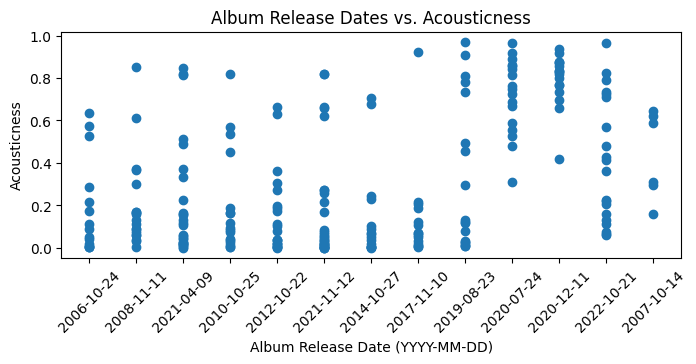

In [38]:
#Question 8: What is the trend in acousticness over time?
acoustic_release = taylor_data[['album_release', 'acousticness']]
acoustic_release = acoustic_release.dropna()
sorted_acoustic_release = acoustic_release.sort_values('album_release', ascending=True)

album_release_dataframe = pd.DataFrame(acoustic_release)
album_release_dates = album_release_dataframe['album_release'].tolist()

acousticness_dataframe = pd.DataFrame(acoustic_release)
acousticness_values = acousticness_dataframe['acousticness'].tolist()

plot = plt.figure()
plot.set_figheight(10)
plot.set_figwidth(8)
plt.subplot(3, 1, 3)
plt.scatter(album_release_dates, acousticness_values)
plt.title("Album Release Dates vs. Acousticness")
plt.xlabel('Album Release Date (YYYY-MM-DD)')
plt.xticks(rotation = 45)
plt.ylabel('Acousticness')
plt.show()

Observe that there is no correlation between the date the album was released and acousticness of the album.
